# Projeto Interpretabilidade de modelos 

Grupo:
- Lucas dos Reis Silva
- Gabriel Homci




In [33]:
import pandas as pd
from rich import print as rprint


In [34]:
df = pd.read_csv("dataset/permier_league_2024.csv")
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA
0,E0,16/08/2024,20:00,Man United,Fulham,1,0,H,0,0,...,1.86,2.07,1.83,2.11,1.88,2.11,1.82,2.05,1.90,2.08
1,E0,17/08/2024,12:30,Ipswich,Liverpool,0,2,A,0,0,...,2.05,1.88,2.04,1.90,2.20,2.00,1.99,1.88,2.04,1.93
2,E0,17/08/2024,15:00,Arsenal,Wolves,2,0,H,1,0,...,2.02,1.91,2.00,1.90,2.05,1.93,1.99,1.87,2.02,1.96
3,E0,17/08/2024,15:00,Everton,Brighton,0,3,A,0,1,...,1.87,2.06,1.86,2.07,1.92,2.10,1.83,2.04,1.88,2.11
4,E0,17/08/2024,15:00,Newcastle,Southampton,1,0,H,1,0,...,1.87,2.06,1.88,2.06,1.89,2.10,1.82,2.05,1.89,2.10


In [35]:
columns = [
    "Date",
    "HomeTeam",
    "AwayTeam",
    "FTHG",
    "FTAG",
    "FTR",
    "HTHG",
    "HTAG",
    "HTR",
    "HS",
    "AS",
    "HST",
    "AST",
    "HF",
    "AF",
    "HC",
    "AC",
    "HY",
    "AY",
    "HR",
    "AR",
]

df = df[columns]
column_map = {
    "Date": "match_date",
    "HomeTeam": "home_team",
    "AwayTeam": "away_team",
    "FTHG": "full_time_home_goals",
    "FTAG": "full_time_away_goals",
    "FTR": "full_time_result",
    "HTHG": "half_time_home_goals",
    "HTAG": "half_time_away_goals",
    "HTR": "half_time_result",
    "HS": "home_shots",
    "AS": "away_shots",
    "HST": "home_shots_on_target",
    "AST": "away_shots_on_target",
    "HF": "home_fouls",
    "AF": "away_fouls",
    "HC": "home_corners",
    "AC": "away_corners",
    "HY": "home_yellow_cards",
    "AY": "away_yellow_cards",
    "HR": "home_red_cards",
    "AR": "away_red_cards",
}

df = df.rename(columns=column_map)
teams = df["home_team"].unique()
teams_map = {team:i+1 for i,team in enumerate(teams)}
teams_map_reverse = {i+1:i+1 for i,team in enumerate(teams)}

df['half_time_result'] = df['half_time_result'].map({'A': 0, 'D': 1, 'H': 2})
df['full_time_result'] = df['full_time_result'].map({'A': 0, 'D': 1, 'H': 2})
df['home_team'] = df['home_team'].map(teams_map)
df['away_team'] = df['away_team'].map(teams_map)
df['match_date'] = pd.to_datetime(df['match_date']) 
df = df.sort_values('match_date').reset_index(drop=True)
df

C:\Users\Lucas\AppData\Local\Temp\ipykernel_31256\547852214.py:59: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['match_date'] = pd.to_datetime(df['match_date'])


,match_date,home_team,away_team,full_time_home_goals,full_time_away_goals,full_time_result,half_time_home_goals,half_time_away_goals,half_time_result,home_shots,...,home_shots_on_target,away_shots_on_target,home_fouls,away_fouls,home_corners,away_corners,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards
0,2024-08-16,1,13,1,0,2,0,0,1,14,...,5,2,12,10,7,8,2,3,0,0
1,2024-08-17,2,20,0,2,0,0,0,1,7,...,2,5,9,18,2,10,3,1,0,0
2,2024-08-17,3,19,2,0,2,1,0,2,18,...,6,3,17,14,8,2,2,2,0,0
3,2024-08-17,4,11,0,3,0,0,1,0,9,...,1,5,8,8,1,5,1,1,1,0
4,2024-08-17,5,15,1,0,2,1,0,2,3,...,1,4,15,16,3,12,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2025-05-25,2,7,1,3,0,0,1,0,14,...,4,6,10,9,4,0,1,1,0,0
376,2025-05-25,13,14,0,2,0,0,1,0,13,...,3,5,11,5,1,6,0,0,0,0
377,2025-05-25,18,10,2,0,2,0,0,1,20,...,7,0,19,16,6,1,0,2,0,0
378,2025-05-25,20,12,1,1,1,0,1,0,14,...,3,5,7,10,11,0,1,0,1,0


In [36]:
dataset = []

teams = df["home_team"].unique()

for _, row in df.iterrows():
    date = row["match_date"]
    home_team = row["home_team"]
    away_team = row["away_team"]
    result = row["full_time_result"]

    cols_to_drop = ["match_date","home_team","away_team"]

    home_stats = df[(df["home_team"]==home_team) & (df["match_date"]<date)].drop(columns=cols_to_drop)
    away_stats = df[(df["away_team"]==away_team) & (df["match_date"]<date)].drop(columns=cols_to_drop)


    if home_stats.shape[0] == 0:
        continue
    if away_stats.shape[0] == 0:
        continue

    pre_match_stats = {"date":date,"result":result,"home_team":home_team,"away_team":away_team}

    for column_name, series in home_stats.items():
        key = f"Home_stats_{column_name}"
        metric = series.mean()
        pre_match_stats[key] = metric

    for column_name, series in home_stats.items():
        key = f"Home_stats_{column_name}"
        metric = series.mean()
        pre_match_stats[key] = metric

    for column_name, series in away_stats.items():
        key = f"away_stats_{column_name}"
        metric = series.mean()
        pre_match_stats[key] = metric

    dataset.append(pre_match_stats)

In [37]:
df = pd.DataFrame(dataset)
#with pd.option_context('display.max_rows', None):
display(df)  

,date,result,home_team,away_team,Home_stats_full_time_home_goals,Home_stats_full_time_away_goals,Home_stats_full_time_result,Home_stats_half_time_home_goals,Home_stats_half_time_away_goals,Home_stats_half_time_result,...,away_stats_home_shots_on_target,away_stats_away_shots_on_target,away_stats_home_fouls,away_stats_away_fouls,away_stats_home_corners,away_stats_away_corners,away_stats_home_yellow_cards,away_stats_away_yellow_cards,away_stats_home_red_cards,away_stats_away_red_cards
0,2024-08-31,1,6,19,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,...,6.000000,3.000000,17.000000,14.000000,8.000000,2.000000,2.000000,2.000000,0.000000,0.000000
1,2024-08-31,0,7,14,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,...,3.000000,5.000000,12.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000
2,2024-08-31,0,10,17,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,3.000000,18.000000,11.000000,5.000000,3.000000,1.000000,2.000000,0.000000,0.000000
3,2024-08-31,2,8,15,2.000000,1.000000,2.000000,1.000000,0.000000,2.000000,...,1.000000,4.000000,15.000000,16.000000,3.000000,12.000000,2.000000,4.000000,1.000000,0.000000
4,2024-08-31,0,4,18,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,...,8.000000,4.000000,17.000000,8.000000,2.000000,6.000000,1.000000,3.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2025-05-25,0,2,7,0.722222,2.277778,0.333333,0.444444,1.166667,0.722222,...,4.888889,3.833333,10.277778,11.555556,6.222222,3.666667,1.388889,1.888889,0.055556,0.111111
356,2025-05-25,0,13,14,1.500000,1.555556,1.055556,0.833333,0.500000,1.222222,...,4.055556,5.500000,9.388889,7.611111,3.888889,6.333333,2.277778,1.333333,0.000000,0.055556
357,2025-05-25,2,18,10,1.166667,0.888889,1.000000,0.555556,0.333333,1.111111,...,6.166667,3.111111,10.222222,10.888889,6.500000,3.333333,1.611111,2.388889,0.111111,0.000000
358,2025-05-25,1,20,12,2.277778,0.833333,1.722222,1.111111,0.277778,1.444444,...,4.055556,4.944444,10.166667,11.277778,4.888889,4.722222,1.722222,2.111111,0.055556,0.000000


In [38]:
cutoff_date = pd.to_datetime('2025-05-16')

# Training data (before cutoff)
train_df = df[df['date'] < cutoff_date].drop(columns=["date"])
# Test data (on or after cutoff)
test_df = df[df['date'] >= cutoff_date].drop(columns=["date"])

print(f"Train = {len(train_df)}")
print(f"Test = {len(test_df)}")

X_train = train_df.drop(columns=['result'])
y_train = train_df['result']
X_test = test_df.drop(columns=['result'])
y_test = test_df['result']

Train = 340
Test = 20


In [39]:
X_train

,home_team,away_team,Home_stats_full_time_home_goals,Home_stats_full_time_away_goals,Home_stats_full_time_result,Home_stats_half_time_home_goals,Home_stats_half_time_away_goals,Home_stats_half_time_result,Home_stats_home_shots,Home_stats_away_shots,...,away_stats_home_shots_on_target,away_stats_away_shots_on_target,away_stats_home_fouls,away_stats_away_fouls,away_stats_home_corners,away_stats_away_corners,away_stats_home_yellow_cards,away_stats_away_yellow_cards,away_stats_home_red_cards,away_stats_away_red_cards
0,6,19,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,14.000000,13.000000,...,6.000000,3.000000,17.000000,14.000000,8.000000,2.000000,2.000000,2.000000,0.000000,0.000000
1,7,14,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,14.000000,15.000000,...,3.000000,5.000000,12.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000
2,10,17,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,7.000000,15.000000,...,3.000000,3.000000,18.000000,11.000000,5.000000,3.000000,1.000000,2.000000,0.000000,0.000000
3,8,15,2.000000,1.000000,2.000000,1.000000,0.000000,2.000000,9.000000,14.000000,...,1.000000,4.000000,15.000000,16.000000,3.000000,12.000000,2.000000,4.000000,1.000000,0.000000
4,4,18,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,9.000000,10.000000,...,8.000000,4.000000,17.000000,8.000000,2.000000,6.000000,1.000000,3.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,5,9,2.235294,1.117647,1.411765,1.176471,0.411765,1.470588,15.529412,12.588235,...,4.529412,5.058824,13.058824,11.588235,3.882353,5.941176,2.823529,2.705882,0.058824,0.000000
336,1,7,1.235294,1.529412,0.882353,0.529412,0.705882,0.823529,13.882353,10.823529,...,4.882353,3.823529,10.705882,11.470588,6.117647,3.588235,1.470588,1.941176,0.058824,0.117647
337,6,10,1.411765,0.764706,1.294118,0.764706,0.117647,1.411765,12.294118,13.176471,...,6.294118,2.941176,10.176471,10.882353,6.647059,3.294118,1.529412,2.352941,0.117647,0.000000
338,16,12,2.000000,1.705882,0.882353,0.882353,0.941176,1.000000,15.117647,12.176471,...,4.235294,4.647059,10.058824,11.352941,4.941176,4.529412,1.764706,2.176471,0.058824,0.000000


In [40]:
import xgboost as xgb
from sklearn.metrics import classification_report

In [46]:
model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.01,
    max_depth=4,
    random_state=42
)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.00      0.00      0.00         2
           2       0.64      0.70      0.67        10

    accuracy                           0.60        20
   macro avg       0.42      0.44      0.43        20
weighted avg       0.57      0.60      0.58        20



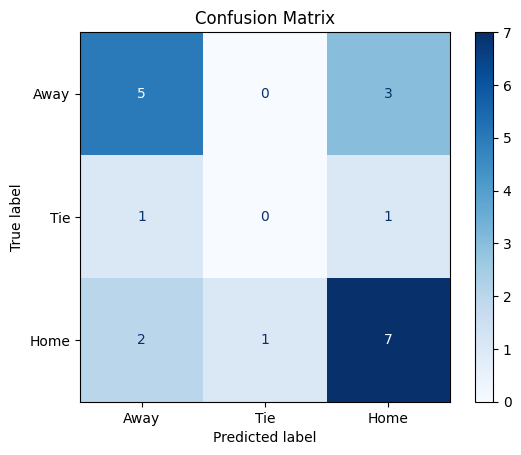

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Away", "Tie", "Home"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

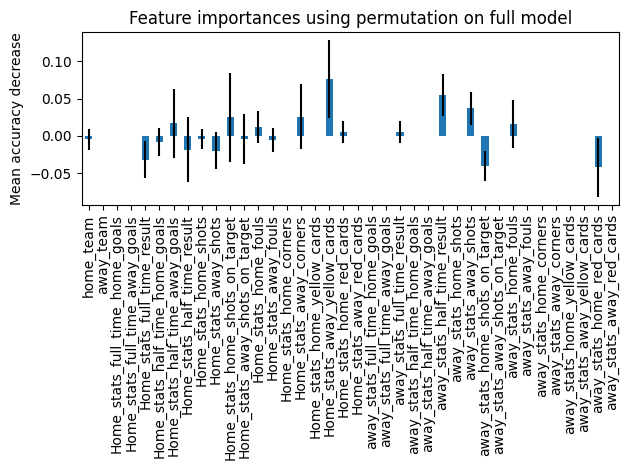

In [43]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(model, X_test, y_test,n_repeats=100, random_state=2)

forest_importances = pd.Series(result.importances_mean, index=X_train.columns)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()